In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# 1. 데이터 로드
data = pd.read_csv(r'/content/drive/My Drive/대학/2025-1/인공지능개론/dataset/seeds_dataset.txt',
                   sep='\s+', header=None)

# 입력과 출력 분리
X = data.iloc[:, :-1].values  # 0~6열: 7개의 특성
y = data.iloc[:, -1].values   # 7열: 클래스 (1,2,3)

# 라벨을 0부터 시작하도록 조정
y -= 1

# 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 원-핫 인코딩
y_cat = to_categorical(y, num_classes=3)

# 훈련/검증 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_seq = Sequential([
    Dense(16, activation='relu', input_shape=(7,)),
    Dense(12, activation='relu'),
    Dense(3, activation='softmax')
])

model_seq.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_seq.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.3540 - loss: 1.2881 - val_accuracy: 0.2647 - val_loss: 1.2150
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3976 - loss: 1.1213 - val_accuracy: 0.3529 - val_loss: 1.0397
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4462 - loss: 0.9968 - val_accuracy: 0.6765 - val_loss: 0.8976
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7374 - loss: 0.8697 - val_accuracy: 0.9118 - val_loss: 0.7820
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8667 - loss: 0.7899 - val_accuracy: 0.9412 - val_loss: 0.6679
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9571 - loss: 0.6796 - val_accuracy: 0.9706 - val_loss: 0.5686
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8984 - loss: 0.6086 - val_accuracy: 0.9706 - val_loss: 0.4812
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9073 - loss: 0.5228 - val_accuracy: 0.9706 - val_loss: 0.

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_layer = Input(shape=(7,))
x = Dense(16, activation='relu')(input_layer)
x = Dense(12, activation='relu')(x)
output_layer = Dense(3, activation='softmax')(x)

model_func = Model(inputs=input_layer, outputs=output_layer)
model_func.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_func.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3174 - loss: 1.1469 - val_accuracy: 0.6176 - val_loss: 0.9962
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5139 - loss: 0.9953 - val_accuracy: 0.7353 - val_loss: 0.8844
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6735 - loss: 0.8845 - val_accuracy: 0.7059 - val_loss: 0.7963
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7070 - loss: 0.8214 - val_accuracy: 0.7059 - val_loss: 0.7275
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7437 - loss: 0.7921 - val_accuracy: 0.7059 - val_loss: 0.6712
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7898 - loss: 0.6722 - val_accuracy: 0.7353 - val_loss: 0.6166
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7572 - loss: 0.6792 - val_accuracy: 0.7941 - val_loss: 0.5591
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8662 - loss: 0.5654 - val_accuracy: 0.8529 - val_los

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

class SeedsModel(Model):
    def __init__(self):
        super(SeedsModel, self).__init__()
        self.d1 = Dense(16, activation='relu')
        self.d2 = Dense(12, activation='relu')
        self.out = Dense(3, activation='softmax')

    def call(self, x):
        x = self.d1(x)
        x = self.d2(x)
        return self.out(x)

model_class = SeedsModel()
model_class.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_class.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2829 - loss: 1.3024 - val_accuracy: 0.4118 - val_loss: 1.0702
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4137 - loss: 1.0308 - val_accuracy: 0.5000 - val_loss: 0.8939
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5025 - loss: 0.9233 - val_accuracy: 0.6765 - val_loss: 0.7922
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6621 - loss: 0.8355 - val_accuracy: 0.8824 - val_loss: 0.7034
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7853 - loss: 0.7541 - val_accuracy: 0.9412 - val_loss: 0.6208
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8259 - loss: 0.6814 - val_accuracy: 0.9412 - val_loss: 0.5496
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8378 - loss: 0.6371 - val_accuracy: 0.9412 - val_loss: 0.4859
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8494 - loss: 0.6008 - val_accuracy: 0.9412 - val_loss

In [9]:
models = {
    "Sequential": model_seq,
    "Functional API": model_func,
    "Subclassing Model": model_class
}

for name, model in models.items():
    print(f"\n📊 {name} 평가 결과:")
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Loss: {loss:.4f} / Accuracy: {accuracy:.4f}")



📊 Sequential 평가 결과:
Loss: 0.1493 / Accuracy: 0.9286

📊 Functional API 평가 결과:
Loss: 0.1765 / Accuracy: 0.9286

📊 Subclassing Model 평가 결과:
Loss: 0.1666 / Accuracy: 0.9286


In [6]:
# 테스트 데이터에 대해 평가
loss, accuracy = model_seq.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9211 - loss: 0.1557
Test Loss: 0.1493
Test Accuracy: 0.9286


In [7]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# 예측값 확률 → 클래스 인덱스로 변환
y_pred_proba = model_seq.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)

# 분류 리포트 (정확도, 정밀도, 재현율, F1 등)
print(classification_report(y_true, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
              precision    recall  f1-score   support

     Class 1       0.83      0.91      0.87        11
     Class 2       1.00      1.00      1.00        14
     Class 3       0.94      0.88      0.91        17

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42



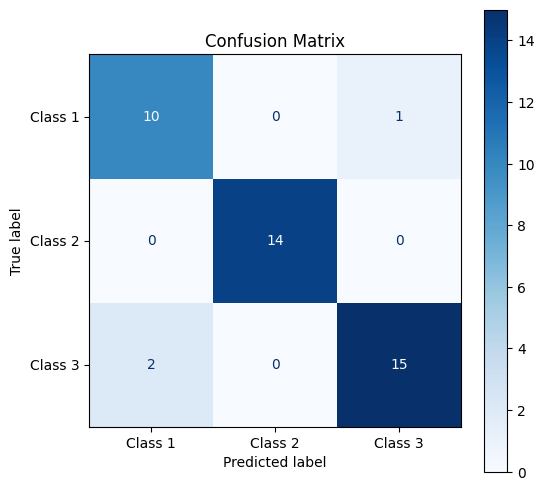

In [8]:
# 혼동 행렬 생성
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 1', 'Class 2', 'Class 3'])

# 시각화
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()
